In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import os

In [3]:
prof = np.genfromtxt("CoRuCo/output/profile.out50")

def tanh_model(xs, x0, delta, me):
    return me*np.tanh(np.pi*(xs-x0)/delta)

def fit_domain_wall(xs, magzs):
    (fit_x0, fit_delta, fit_me), res = scipy.optimize.curve_fit(tanh_model, xs, magzs, p0=[100, 20, 1])
    return (fit_x0, fit_delta, fit_me)



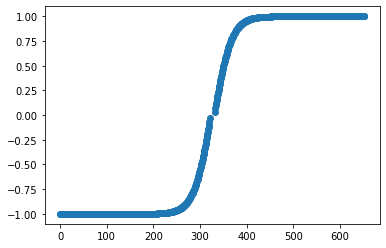

In [4]:
plt.scatter(prof[:,0], prof[:,1])

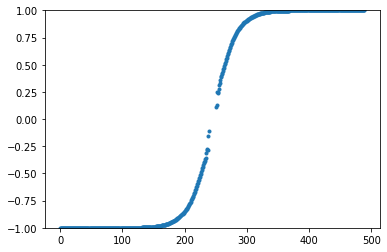

domain wall width [nm]:  27.275814823570506
domain wall width [nm]:  35.033125234817035
domain wall width [nm]:  38.186759416293235
domain wall width [nm]:  38.850569287421095
domain wall width [nm]:  38.57349537144582
domain wall width [nm]:  36.496217121488236
domain wall width [nm]:  35.161569681335905
domain wall width [nm]:  33.652483949044615
domain wall width [nm]:  33.18552565080018
domain wall width [nm]:  32.14306048454904
domain wall width [nm]:  32.21722499871708
domain wall width [nm]:  32.693450544150046
domain wall width [nm]:  33.797932804854746
domain wall width [nm]:  33.75872174572723
domain wall width [nm]:  32.917311143677644
domain wall width [nm]:  33.09301260797981
domain wall width [nm]:  32.75232916747695
domain wall width [nm]:  32.8008154596839
domain wall width [nm]:  32.52941217391681
domain wall width [nm]:  32.39524524837299
domain wall width [nm]:  33.18127548444086
domain wall width [nm]:  33.67401066745671
domain wall width [nm]:  32.51432689974749
do

In [23]:
from matplotlib.animation import FuncAnimation

output_dir = 'CoRuCo/0K_no0/0.010/output'

prof = np.genfromtxt(os.path.join(output_dir, "profile.out0"))

fig, ax = plt.subplots()
ln, = ax.plot(prof[:,0], prof[:,1], linestyle='', marker='.')
ax.set_ylim(-1, 1)

scale = 2.47e-1


widths = []

def init():
    return ln,

def update(i):
    prof = np.genfromtxt(os.path.join(output_dir, "profile.out{}".format(i)))
    
    # spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(i)))
    # xs = pos[:,0]
    # ys = spins[:,2]
    # bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(xs, ys, bins=200)
    # scale = 2.47e-1
    x0, delta, ms = fit_domain_wall(prof[:,0], prof[:,1])
    print("domain wall width [nm]: ", scale*delta)
    widths.append(scale*delta)
    ln.set_data(prof[:,0], prof[:,1])
    return ln,

n = 50
ani = FuncAnimation(fig, update, frames=n,
                    init_func=init, blit=True)
plt.show()
ani.save("animation.gif")
# spins = np.genfromtxt(os.path.join(expdir, "lattice.out{}".format(n-1)))
# xs = pos[:,0]
# ys = spins[:,2]
# x0, delta, ms = fit_domain_wall(xs, ys)
# print("domain wall width [nm]: ", scale*delta)

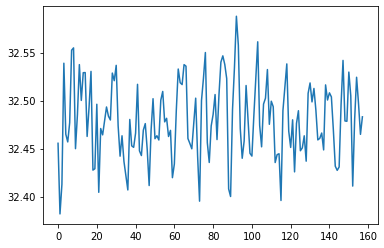

In [40]:
plt.plot(widths[20:])